In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
class_teachers = read.csv("ClassesTeachers2019.csv")

In [3]:
head(class_teachers)

first_name,last_name,department,year,class_ident
Antonella,Ratazzi,PE,1,PE_1a
Gonzales,Redemile,PE,1,PE_1b
Gonzales,Redemile,PE,2,PE_2a
Antonella,Ratazzi,PE,2,PE_2b
Antonella,Ratazzi,PE,3,PE_3a
Delores,Aucott,PE,3,PE_3b


In [4]:
names(class_teachers)

[1] "first_name"  "last_name"   "department"  "year"        "class_ident"

In [5]:
glimpse(class_teachers)

Observations: 164
Variables: 5
$ first_name  <fct> Antonella, Gonzales, Gonzales, Antonella, Antonella, De...
$ last_name   <fct> Ratazzi, Redemile, Redemile, Ratazzi, Ratazzi, Aucott, ...
$ department  <fct> PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, History...
$ year        <int> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 1, 1, 1, 2, 2, 2, 3...
$ class_ident <fct> PE_1a, PE_1b, PE_2a, PE_2b, PE_3a, PE_3b, PE_4a, PE_4b,...


In [6]:
dim(class_teachers)

[1] 164   5

In [7]:
view(class_teachers)

In [10]:
number_classes_each_dep = class_teachers %>%
    group_by(department) %>%
    summarise(number_of_classes = n()) %>%
    arrange(number_of_classes)

In [11]:
number_classes_each_dep

department,number_of_classes
Geography,7
Business,9
Chemistry,10
Biology,12
Languages,12
PE,12
Music,13
Physics,13
English,19
History,19


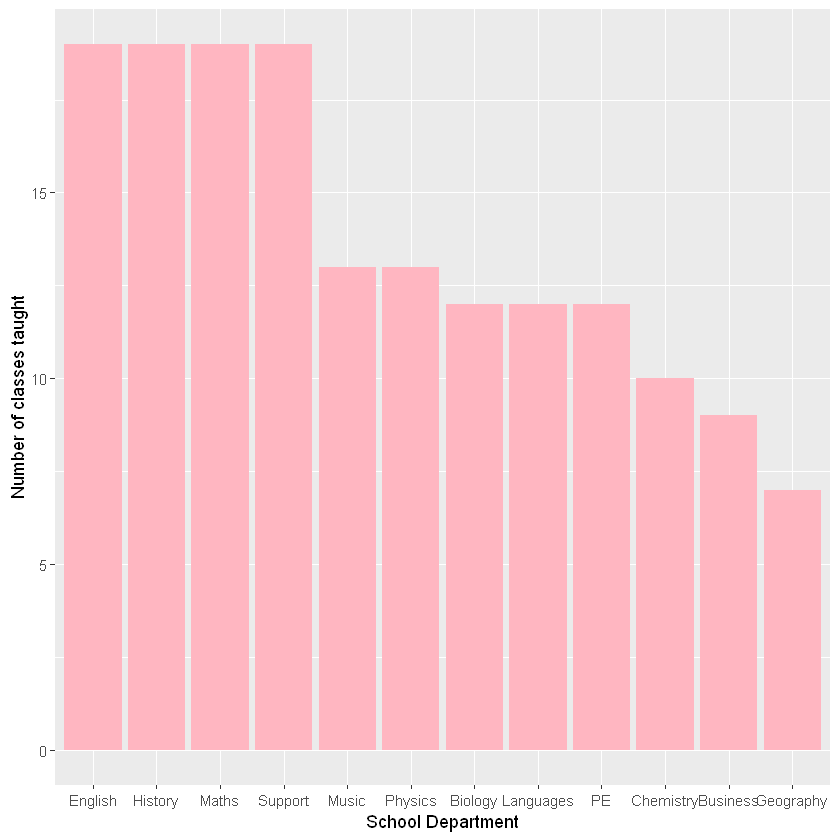

In [14]:
number_classes_each_dep %>% 
    ggplot() +
    aes(x = reorder(department, desc(number_of_classes)) , y = number_of_classes) +
    geom_col(fill="lightpink") +
    xlab("School Department") +
    ylab("Number of classes taught")

In [18]:
number_classes_each_teachers = class_teachers %>%
    group_by(last_name, department) %>%
    summarise(number_of_classes = n()) %>%
    arrange(number_of_classes)

In [19]:
number_classes_each_teachers

last_name,department,number_of_classes
Adamik,Biology,1
Alejandri,Chemistry,1
Ballantine,Music,1
Bartalot,Maths,1
Beddoes,Business,1
Bhar,Chemistry,1
Braizier,Physics,1
Capenor,Maths,1
Cleyburn,Business,1
Dabels,Geography,1


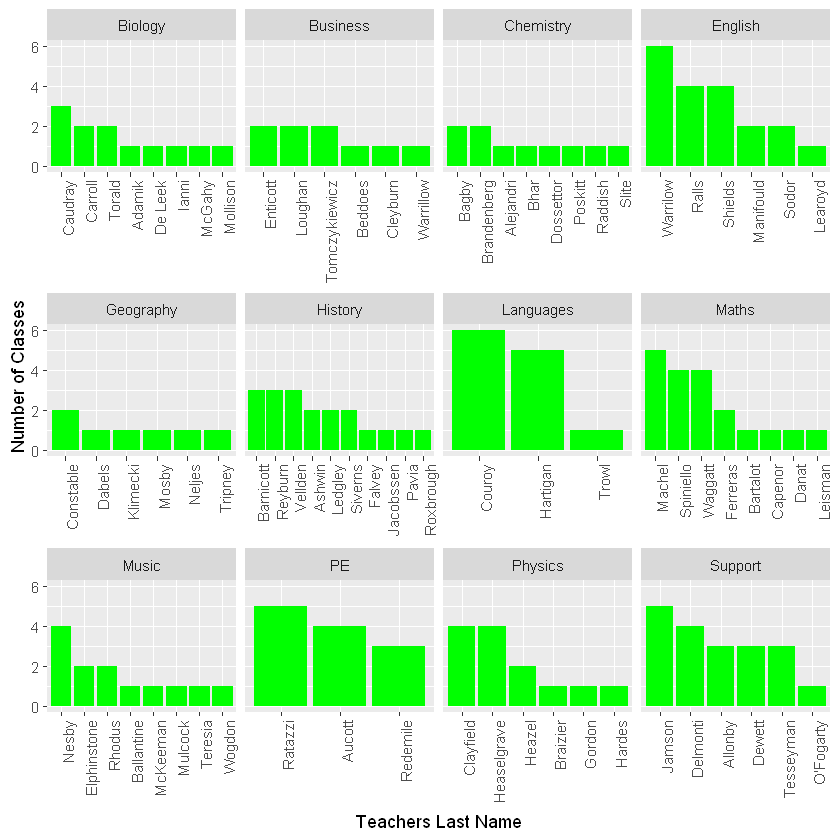

In [20]:
num_classes_each_teachers %>%
    ggplot() +
    aes( x = reorder(last_name, desc(number_of_classes)), y = number_of_classes) +
    geom_col( fill="green") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1) ) +
    xlab( "Teachers Last Name") +
    ylab("Number of Classes") +
    facet_wrap(~department, scale = "free_x")